# Tensorflow Keras API
## Tensorflow Documentation for Keras
### Link : https://www.tensorflow.org/guide/keras/functional

### Setup (configuracion)

In [35]:
import tensorflow as tf
tf.keras.backend.clear_session() # Reseteo de sesion sensillo

## keras Sequential API
### Esta API permite la construccion de modelos con Topologia Lineal

## keras Functional API
### Esta API permite la construccion de modelo con Topologias mas complejas con Multiples Entradas y Multiples Salidas, y Topologias no Lineales

### Se basa en la idea de que un modelo de Deep ANN suele ser un Gráfico Acíclico Dirigido (DAG) de capas.

### La API funcional es un conjunto de herramientas para construir gráficos de capas.

In [36]:
from tensorflow import keras

### Capa de entrada con Input Features en Vector.

In [37]:
inputs_vector = keras.Input(shape=(784, ))

### Capa de entrada con Input Features en Imagen.

In [38]:
inputs_img = keras.Input(shape=(32, 32, 3))

In [39]:
# Vector
print(inputs_vector.shape)
print(inputs_vector.dtype)

# Image
print(inputs_img.shape)
print(inputs_img.dtype)

(None, 784)
<dtype: 'float32'>
(None, 32, 32, 3)
<dtype: 'float32'>


## Crear un nodo en el grafico de capas (solo es el nodo, ya que el modelo aun no se crea)

In [40]:
from keras import layers

# Inputs Vector
dense = layers.Dense(units=64, activation='relu', name='hidden_1_vector')
x_vector = dense(inputs_vector)
print(x_vector)

# Input Image
dense = layers.Dense(units=32, activation='relu', name='hidden_1_img')
x_img = dense(inputs_img)
print(x_img)

KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='hidden_1_vector/Relu:0', description="created by layer 'hidden_1_vector'")
KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 32), dtype=tf.float32, name=None), name='hidden_1_img/Relu:0', description="created by layer 'hidden_1_img'")


### Agregar capas al nodo de grafico de capas.

In [41]:
# vector
x_vector = layers.Dense(units=64, activation='relu', name='hidden_2_vector')(x_vector)

# Image
x_img = layers.Dense(units=128, activation='relu', name='hidden_2_img')(x_img)

### Capa de Salida con Input Features en Vector

In [42]:
outputs_vector = layers.Dense(units='10', activation='softmax', name='output_3_vector')(x_vector)

### Capa de Salida con Input Features en Imagen,

In [43]:
outputs_img = layers.Dense(units=20, activation='softmax', name='output_3_img')(x_img)

### Creacion de Modelos a partir de las capas pre definidas de manera independiente.

In [44]:
model_vector = keras.Model(inputs=inputs_vector, outputs=outputs_vector)

In [45]:
model_img = keras.Model(inputs=inputs_img, outputs=outputs_img)

In [46]:
model_vector.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 hidden_1_vector (Dense)     (None, 64)                50240     
                                                                 
 hidden_2_vector (Dense)     (None, 64)                4160      
                                                                 
 output_3_vector (Dense)     (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_img.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 hidden_1_img (Dense)        (None, 32, 32, 32)        128       
                                                                 
 hidden_2_img (Dense)        (None, 32, 32, 128)       4224      
                                                                 
 output_3_img (Dense)        (None, 32, 32, 20)        2580      
                                                                 
Total params: 6,932
Trainable params: 6,932
Non-trainable params: 0
_________________________________________________________________


## Resumen del desarrollo independiente de las capas.

In [53]:
inputs = keras.Input(shape=(784, ))
x = layers.Dense(units=64, activation='relu', name='hidden_1')(inputs)
x = layers.Dense(units=64, activation='relu', name='hidden_2')(x)
outputs = layers.Dense(units=10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='model_1')
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 hidden_1 (Dense)            (None, 64)                50240     
                                                                 
 hidden_2 (Dense)            (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


### Visualizacion del modelo en grafico (plot)

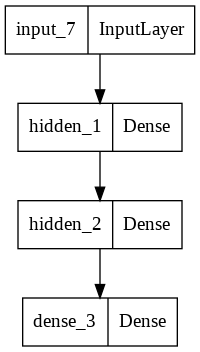

In [54]:
keras.utils.plot_model(model, 'model_1.png')

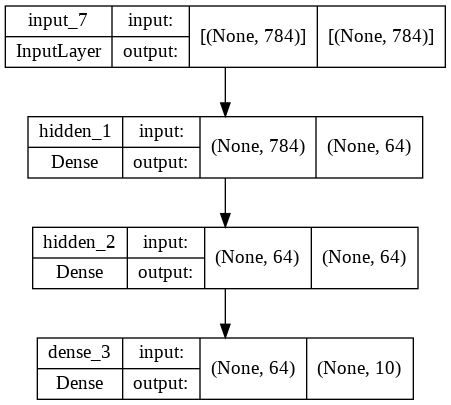

In [55]:
keras.utils.plot_model(model, 'model_1_2.png', show_shapes=True)